## **Data Science Part Time 06**
**Student Name** : **Lydia Masabarakiza**

## **Overview**

This project aims to develop a predictive model for SyriaTel, a telecommunications company, to forecast customer churn. Customer churn, where customers cease using the company's services, is a significant issue impacting revenue and growth. By identifying which customers are likely to churn, SyriaTel can implement targeted strategies to improve retention and customer satisfaction.

## **Business Understanding**
SyriaTel, a prominent telecommunications company, aims to improve customer retention and reduce revenue loss caused by customer churn. Churn occurs when customers stop using the company's services, and it is crucial for SyriaTel to predict which customers are likely to churn soon. By identifying these customers in advance, SyriaTel can implement targeted retention strategies to improve customer satisfaction and loyalty.

## **Problem Statement**
The objective of this project is to develop a predictive model that can accurately classify whether a customer will stop using SyriaTel's services in the near future. This is a binary classification problem where the target variable indicates churn status: '1' for churn and '0' for non-churn. By analyzing customer data and identifying patterns associated with churn, we can provide actionable insights to SyriaTel for preemptive retention efforts.

 ## **Objectives**
 1. **Develop Predictive Models**: Create models to predict customer churn using the provided dataset.

 2. **Analyze Customer Data**: Examine customer demographics, usage patterns, and service interactions to identify churn predictors.

 3. **Provide Actionable Insights**: Offer insights and recommendations based on the model's findings to aid SyriaTel in reducing churn.

## **1. Data Understanding**


1. The dataset includes 3333 records and 21 features, such as customer demographics, account information, usage statistics, and service interactions.

2. **Target Variable**: The target variable is 'churn', indicating whether a customer has churned (False) or not (True).

3. **No Missing Values**: There are no missing values in the dataset.

4. **Feature Types**: The dataset has a mix of categorical (e.g., state, international plan) and numerical (e.g., total day minutes, customer service calls) features.

## **2. Data Preparation**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Loading the data set
df = pd.read_csv("/content/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
# Checking missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [ ]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [ ]:
unique_values = df.nunique()
print("\nNumber of unique values in each column:")
print(unique_values)



Number of unique values in each column:
state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


In [ ]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        unique_values = df[column].unique()
        print(f"Unique values in numeric column '{column}': {unique_values}")

Unique values in numeric column 'account length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]
Unique values in numeric column 'area code': [415 408 510]
Unique values in numeric colum

In [ ]:
df.duplicated().sum()

0

There are no duplicates in the data set

In [ ]:
df.shape

(3333, 21)

The data set has 3333 rows and 21 columns

## **3. Exploratory Data Analysis**

#### **A. Descriptive Statistics**

In [ ]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The output shows the summary statistics of the data

In [ ]:
# Skewness and Kurtosis
# Filter numeric columns
numeric_columns = df.select_dtypes(include=['number'])
skewness = numeric_columns.skew()
kurtosis = numeric_columns.kurt()
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)

Skewness:
 account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
dtype: float64
Kurtosis:
 account length           -0.107836
area code                -0.705632
number vmail messages    -0.051129
total day minutes        -0.019940
total day calls           0.243182
total day charge         -0.019812
total eve minutes         0.025630
total eve calls           0.206156
total eve charge          0.025487
total night minutes       0.085816
total night calls        -0.072020
total night charge

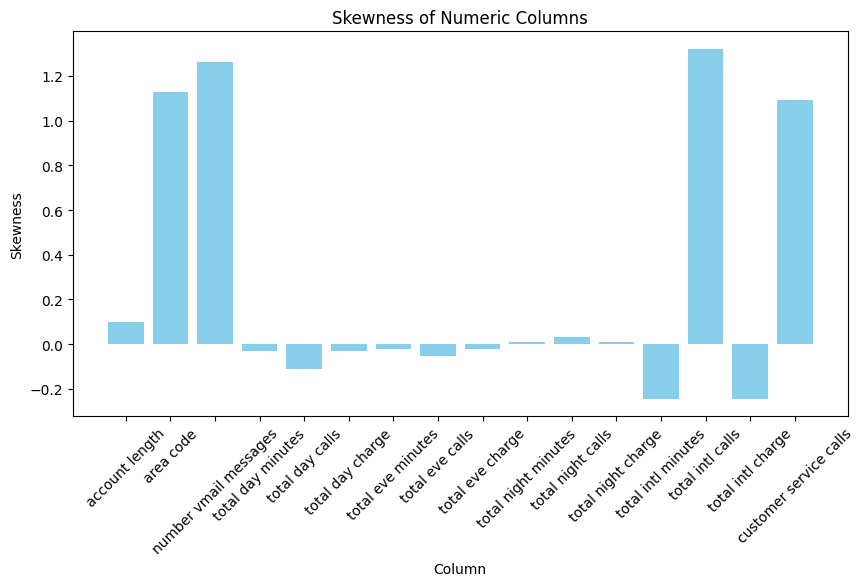

In [ ]:
# Plotting skewness
plt.figure(figsize=(10, 5))
plt.bar(skewness.index, skewness.values, color='skyblue')
plt.title('Skewness of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()

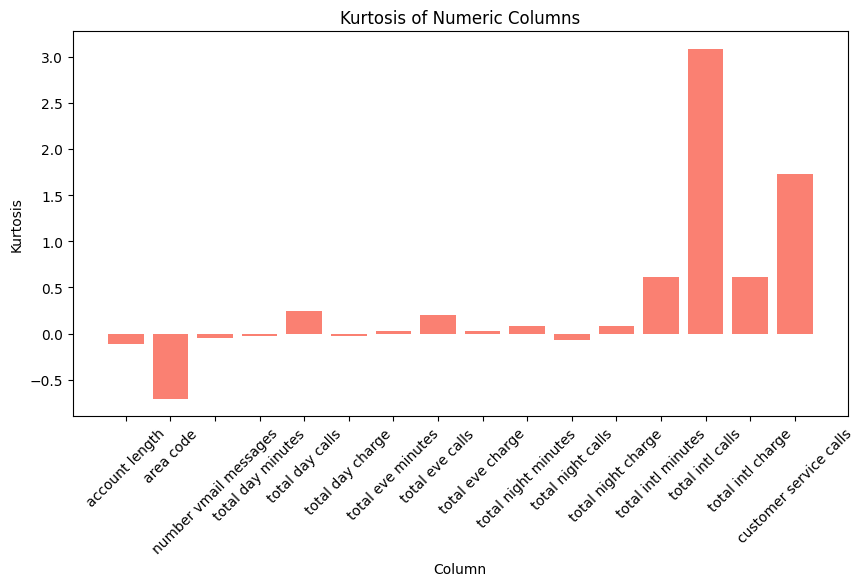

In [ ]:
# Plotting kurtosis
plt.figure(figsize=(10, 5))
plt.bar(kurtosis.index, kurtosis.values, color='salmon')
plt.title('Kurtosis of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.show()

#### **B. Univariate Analysis**

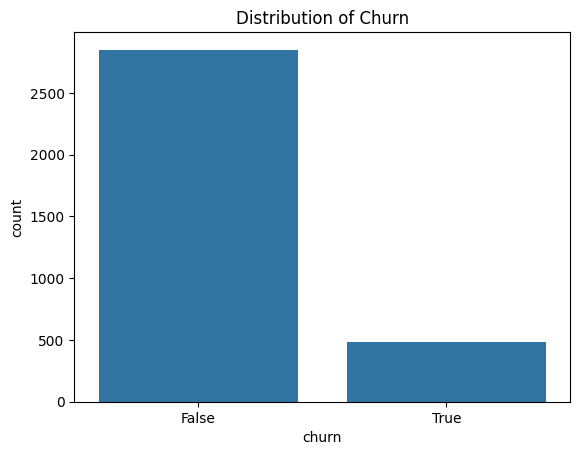

In [ ]:
# Target variable distribution
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.show()

There are more users that have stayed with the company than those that have left.

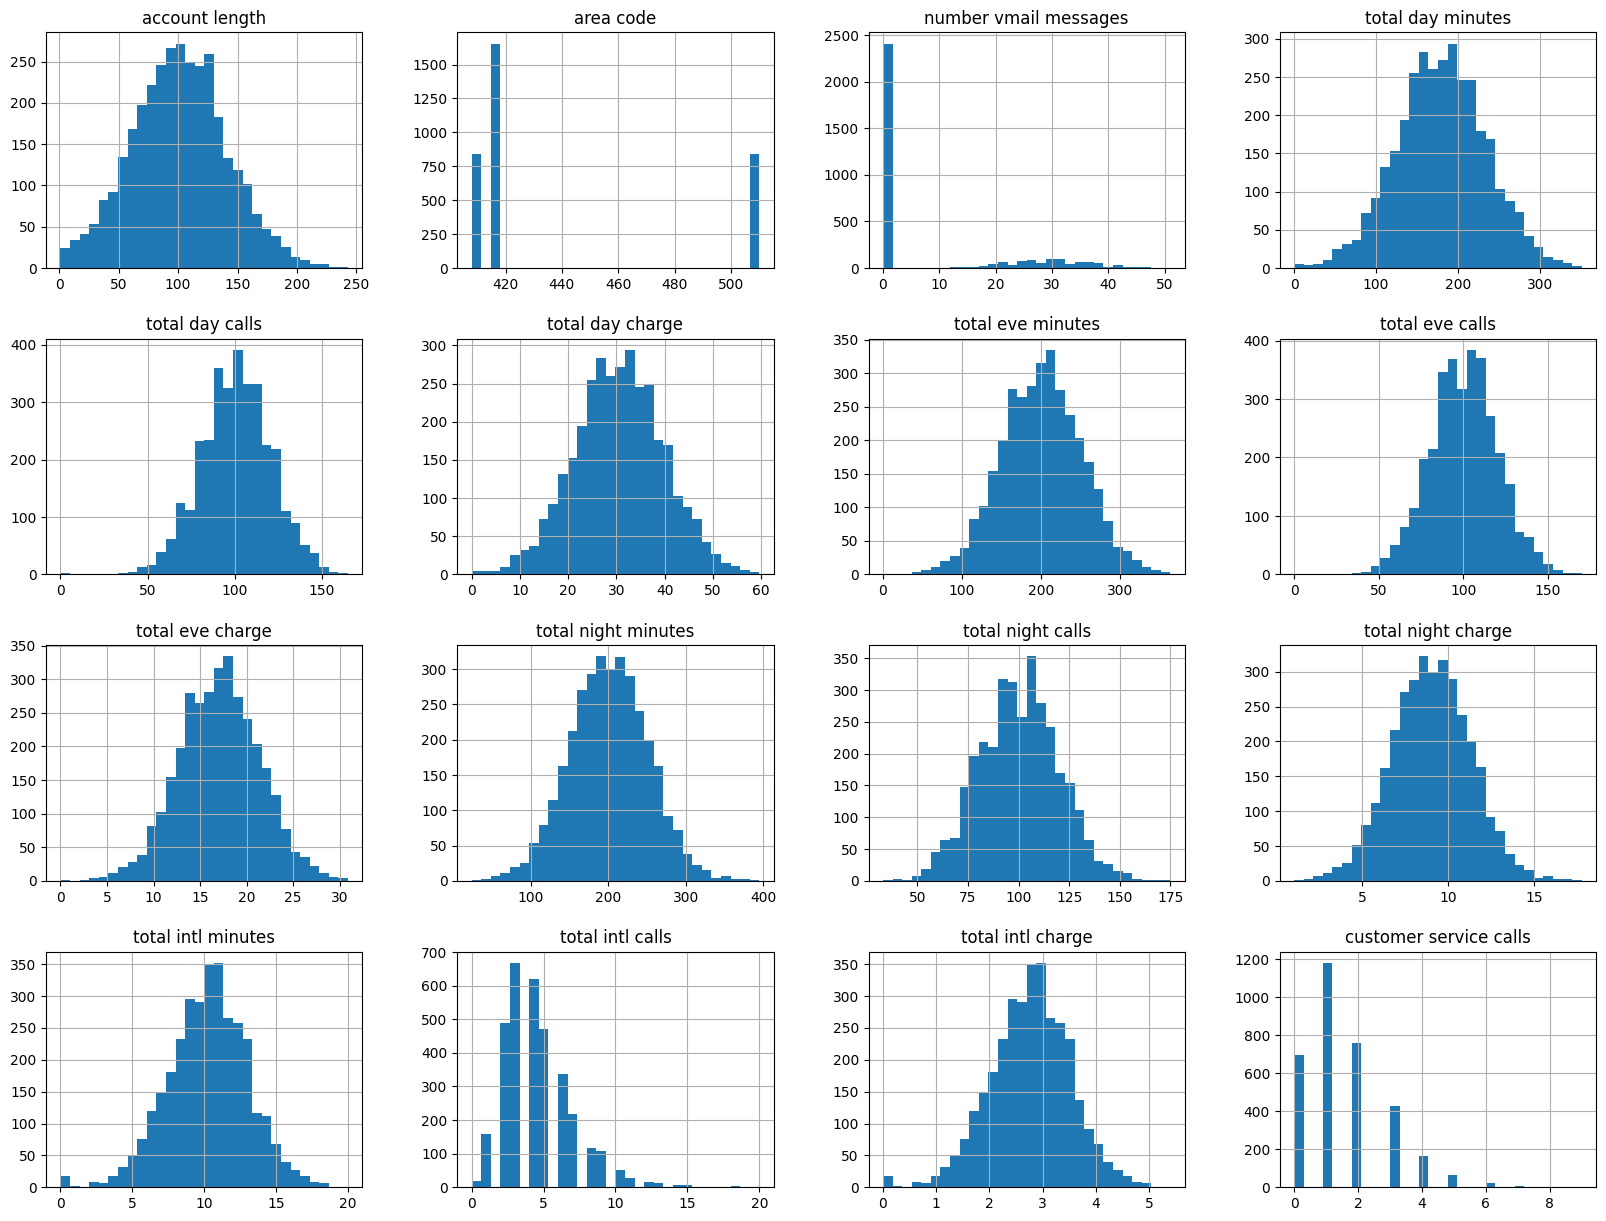

In [ ]:
# Numeric Features Distribution
df.hist(bins=30, figsize=(20, 15))
plt.show()

All the columns have a normal distrubution except from total international calls, customer service calls and area code.

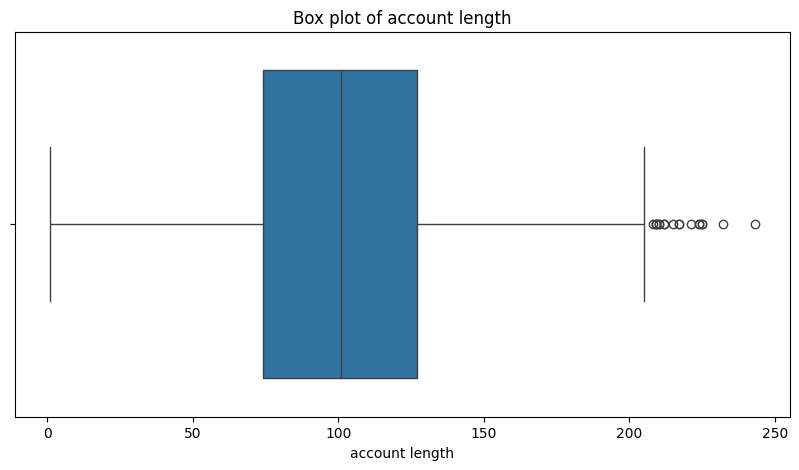

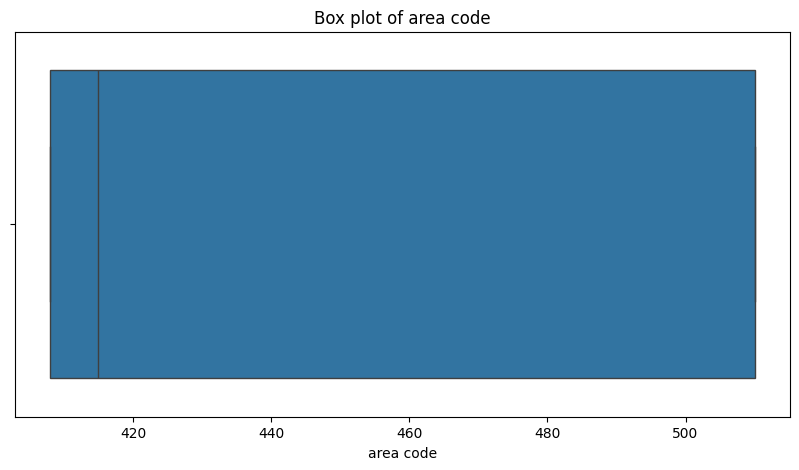

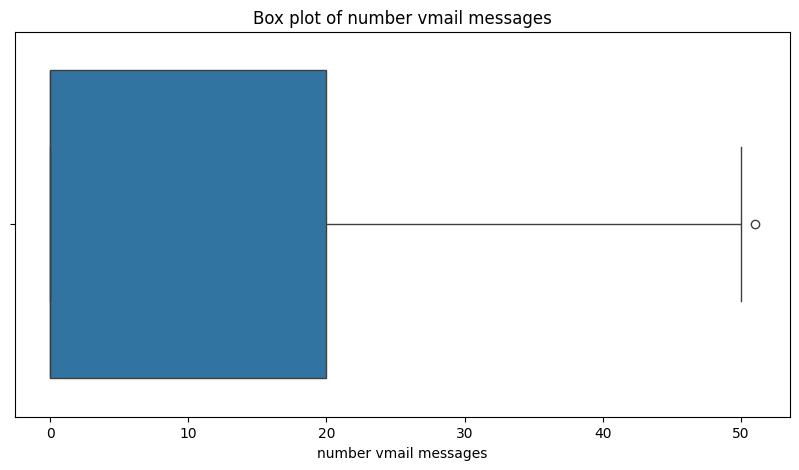

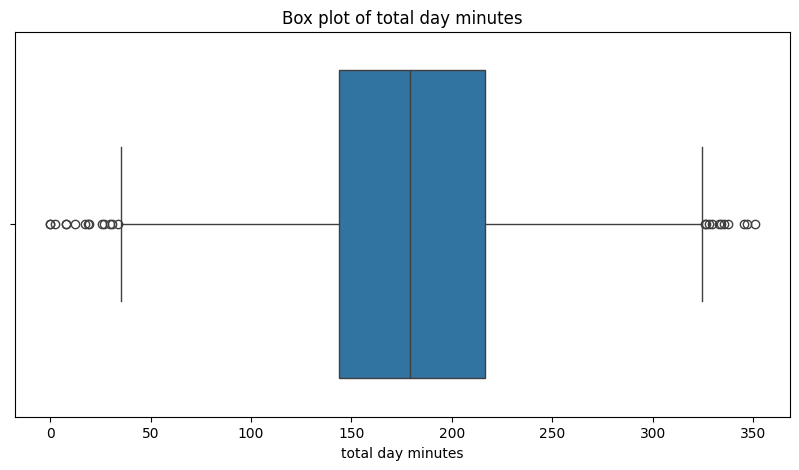

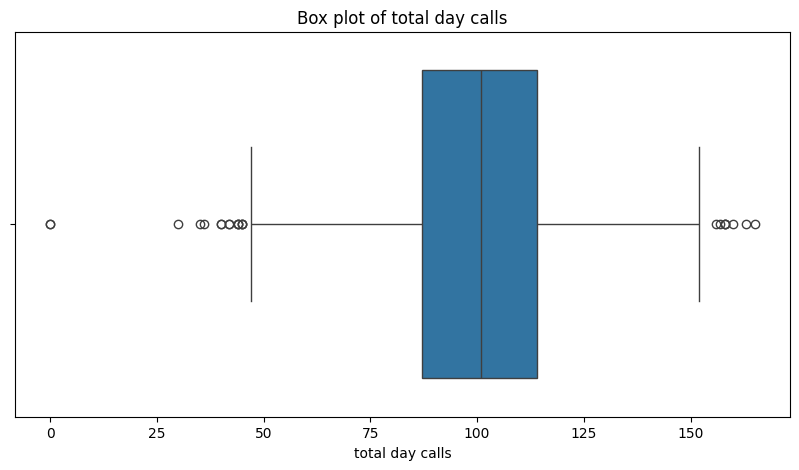

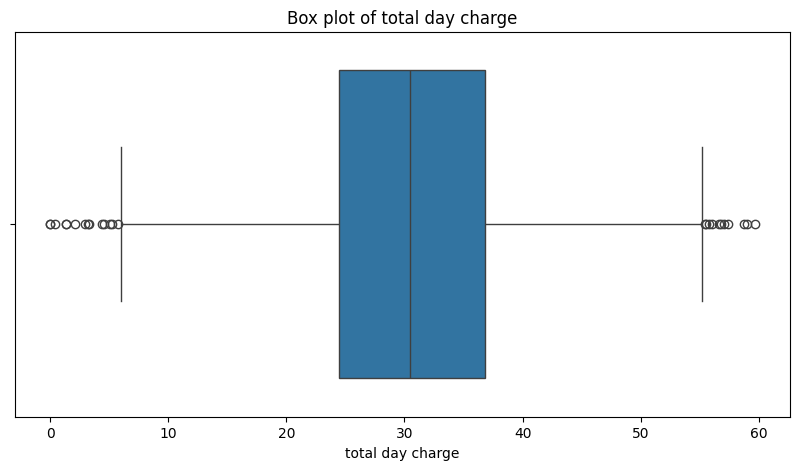

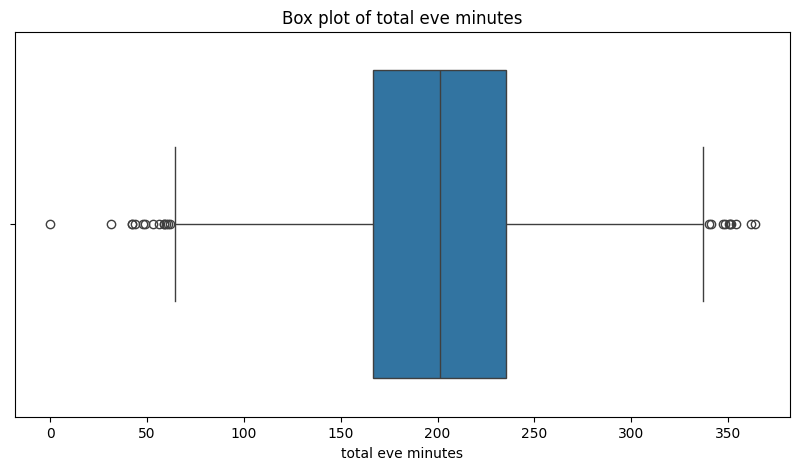

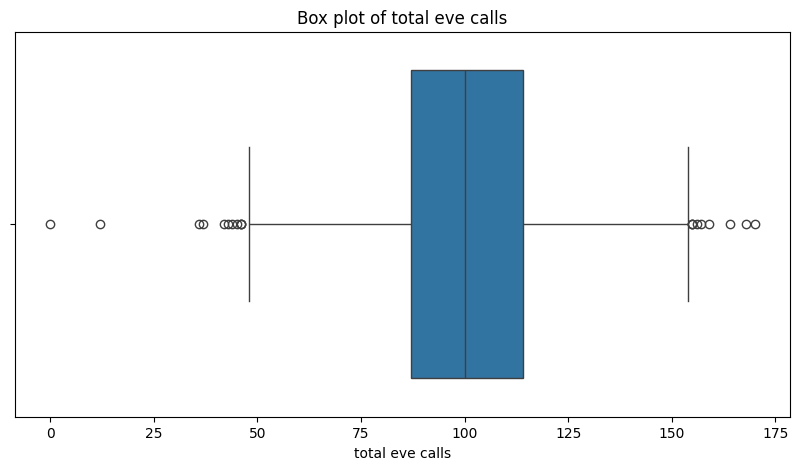

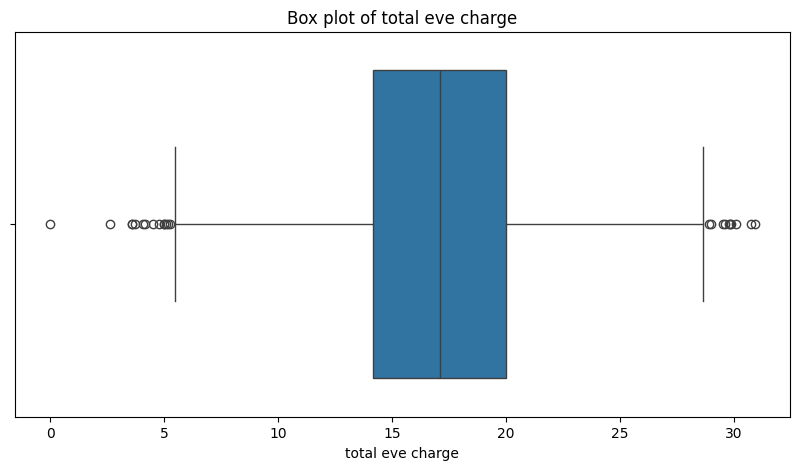

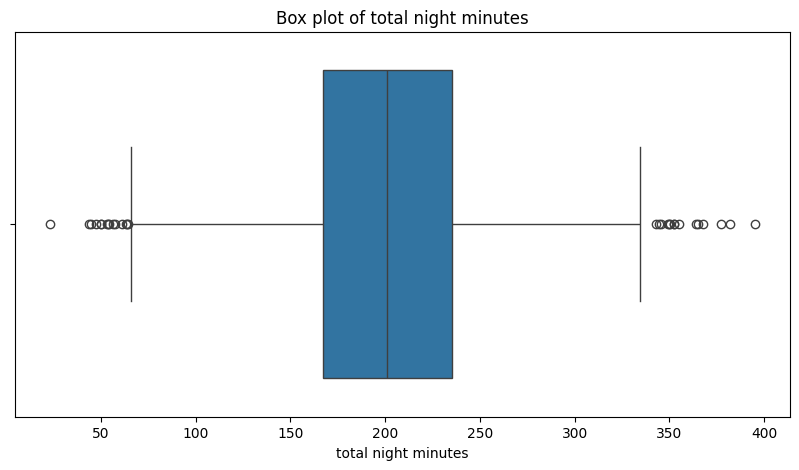

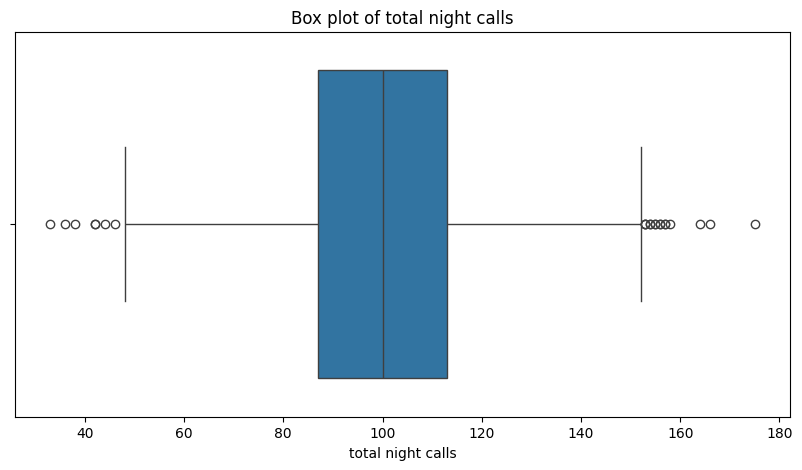

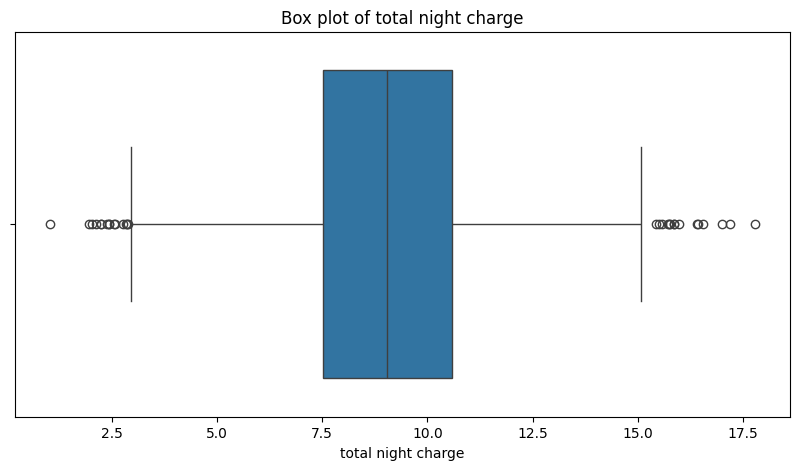

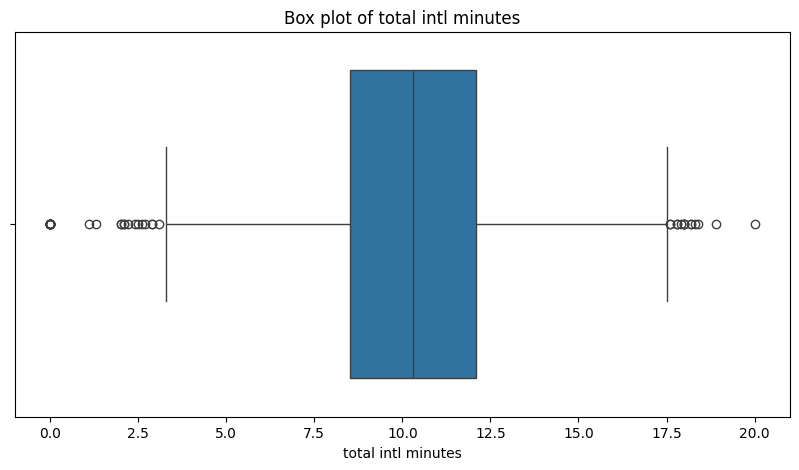

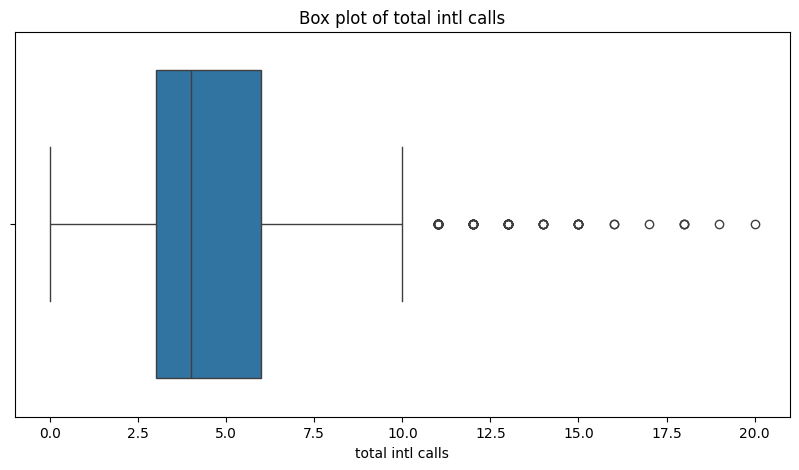

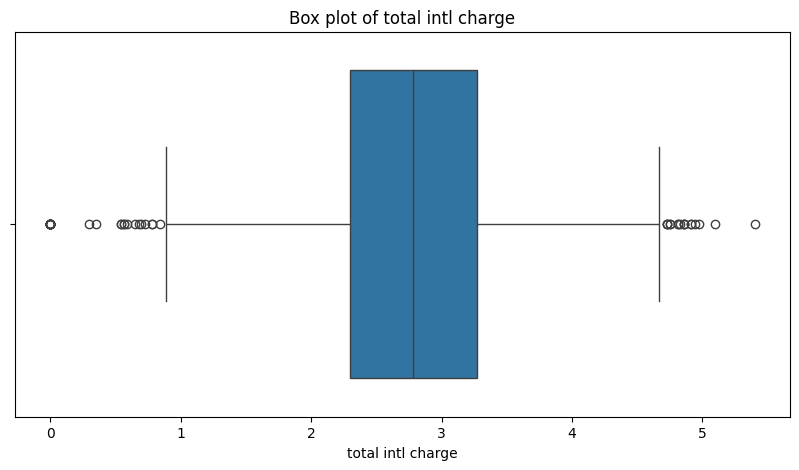

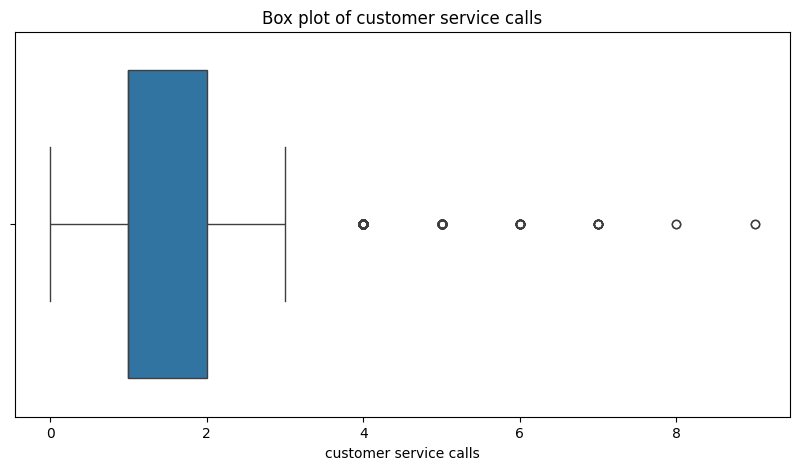

In [ ]:
# Boxplots for numeric variables
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

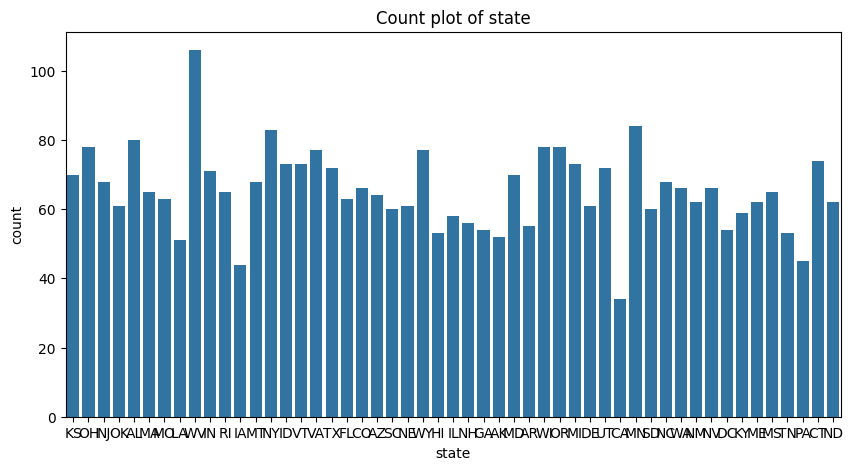

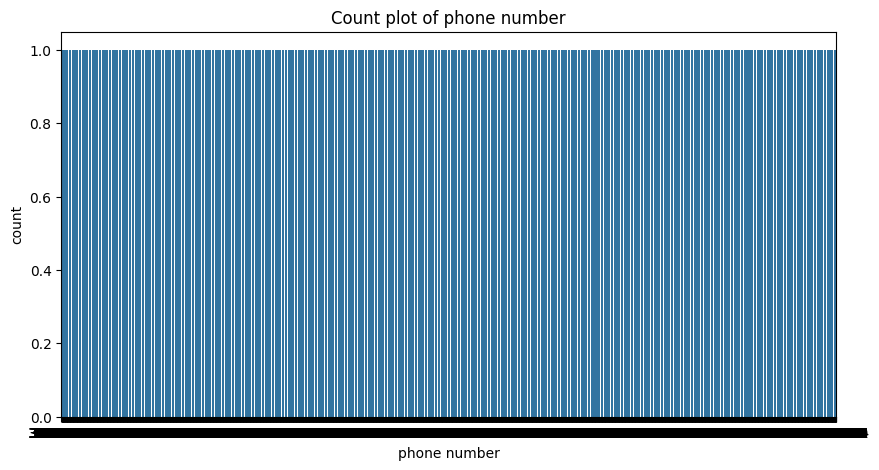

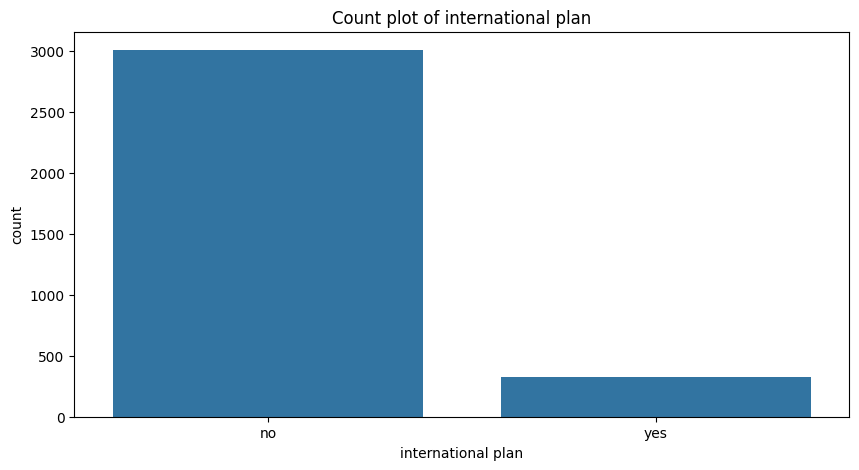

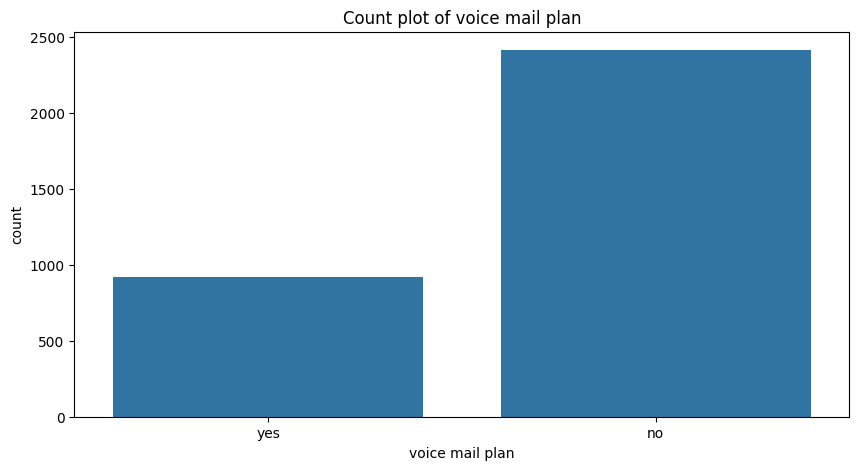

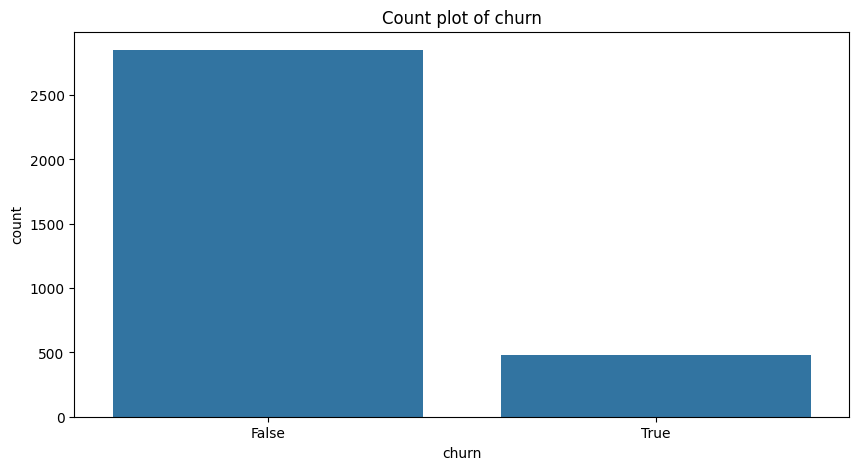

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[column])
    plt.title(f'Count plot of {column}')
    plt.show()

Text(0, 0.5, 'Count')

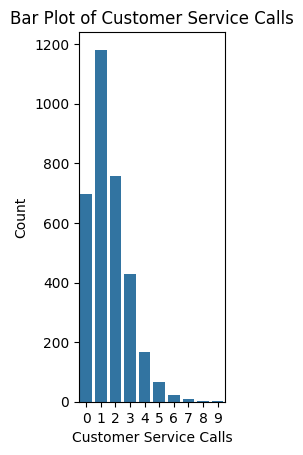

In [ ]:
# Bar Plot
plt.subplot(1, 3, 2)
sns.countplot(x='customer service calls', data=df)
plt.title('Bar Plot of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')

The most number of customer service calls was 1.

### **C. Bivariate Analysis**

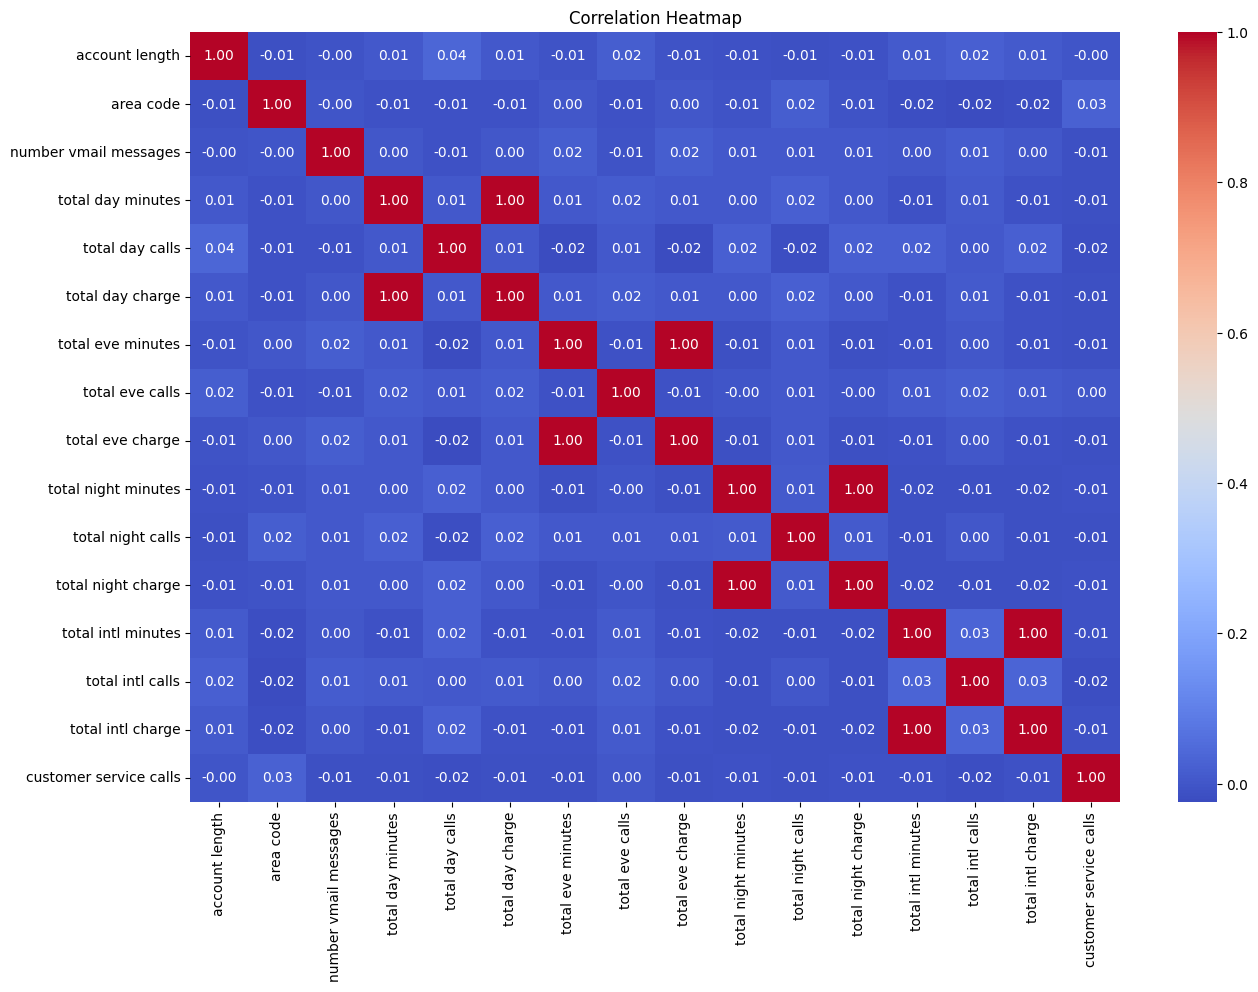

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation between features is very low. With most of the values being in the  negatives

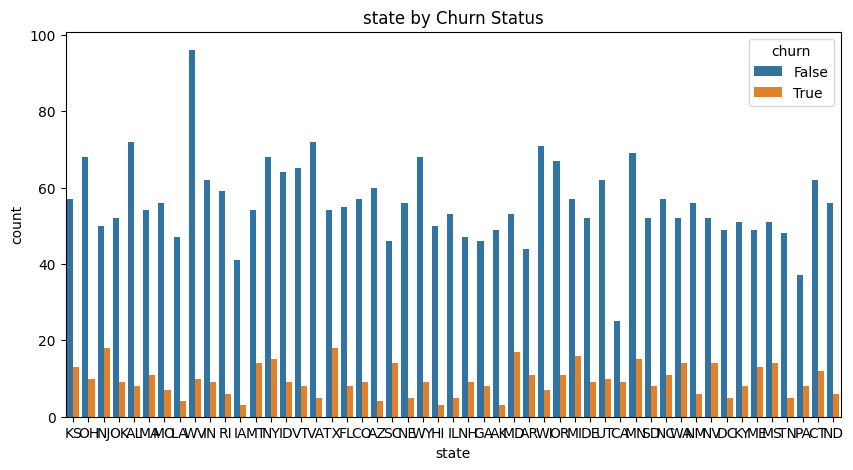

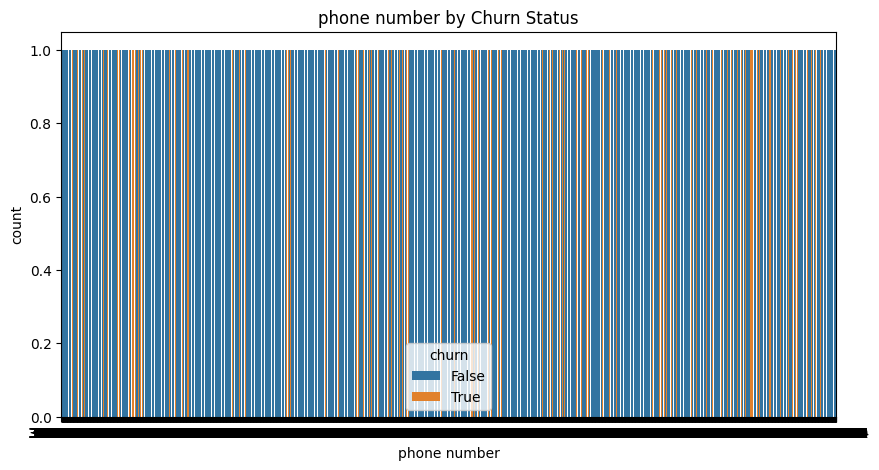

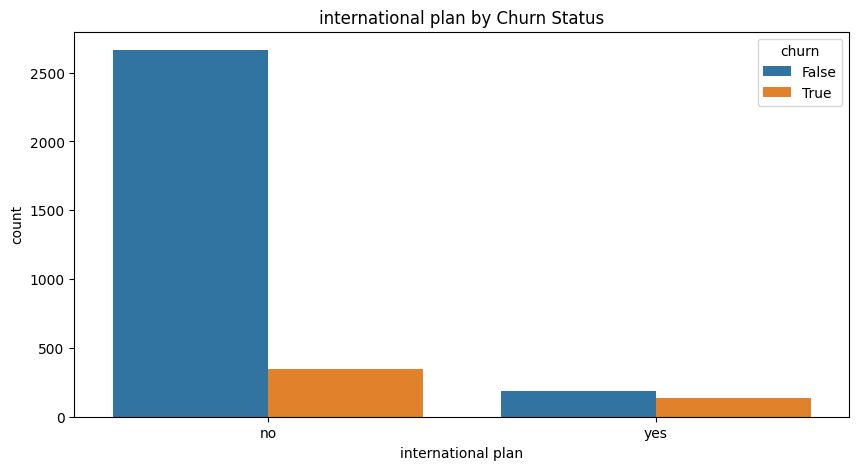

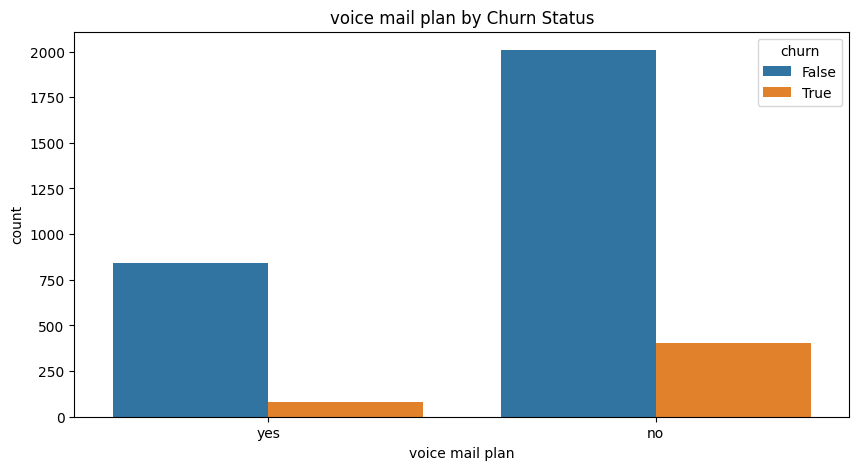

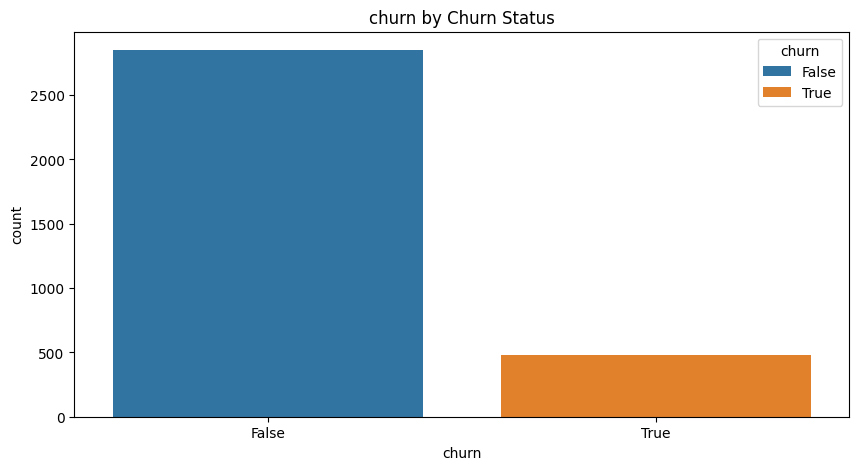

In [ ]:
# Bar plots of categorical features against churn
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, hue='churn', data=df)
    plt.title(f'{column} by Churn Status')
    plt.show()


In [ ]:
# Creating a column full charge
df['full charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge']

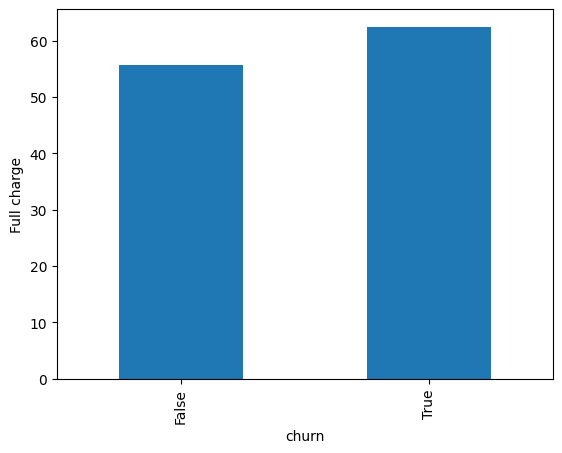

In [ ]:
df.groupby('churn')['full charge'].mean().plot(kind='bar')
plt.ylabel('Full charge')
plt.show();

The people with the most charges had churned (stopped using the telecommunication services)

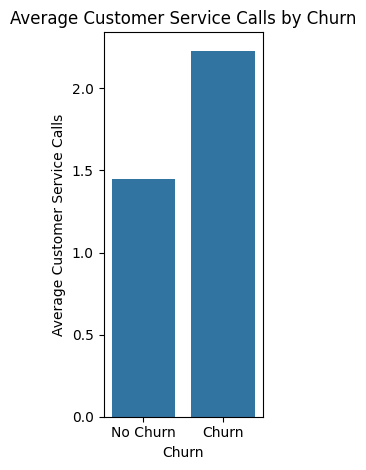

In [ ]:
# Bar Plot of Average Customer Service Calls by Churn
plt.subplot(1, 3, 3)
avg_calls_by_churn = df.groupby('churn')['customer service calls'].mean().reset_index()
sns.barplot(x='churn', y='customer service calls', data=avg_calls_by_churn)
plt.title('Average Customer Service Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Customer Service Calls')
plt.xticks([0, 1], ['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

The customers that churned had a more customer service calls than those that had left.

In [ ]:
# Total calls by state
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
calls_by_state = df.groupby('state')['total_calls'].sum().reset_index().sort_values(by='total_calls', ascending=False)

# Total international calls by state
intl_calls_by_state = df.groupby('state')['total intl calls'].sum().reset_index().sort_values(by='total intl calls', ascending=False)

# Total charges by state
df['total_charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
charges_by_state = df.groupby('state')['total_charges'].sum().reset_index().sort_values(by='total_charges', ascending=False)

In [ ]:
calls_by_state = df.groupby('state')['total_calls'].sum().reset_index()
calls_by_state_sorted = calls_by_state.sort_values(by='total_calls', ascending=False)
print(calls_by_state_sorted)

   state  total_calls
49    WV        32523
23    MN        25807
34    NY        25092
1     AL        24070
35    OH        24060
50    WY        23751
37    OR        23497
45    VA        23483
48    WI        23463
13    ID        22722
22    MI        22657
6     CT        22492
46    VT        22146
43    TX        22144
15    IN        22096
44    UT        21761
16    KS        21426
27    NC        21172
31    NJ        20970
20    MD        20868
26    MT        20377
47    WA        20084
33    NV        20023
25    MS        19911
9     FL        19797
3     AZ        19671
19    MA        19602
39    RI        19525
5     CO        19434
28    ND        19394
24    MO        19348
32    NM        19278
21    ME        19075
36    OK        18930
29    NE        18718
40    SC        18397
8     DE        18392
17    KY        17971
14    IL        17752
41    SD        17517
10    GA        17087
2     AR        16705
30    NH        16585
7     DC        16401
11    HI  

The state West Virgina had the most calls with 32523 and california had the least amount of calls with 10582

<ipython-input-27-cf5c19390214>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_calls', y='state', data=calls_by_state.head(10), palette='viridis')


Text(0, 0.5, 'State')

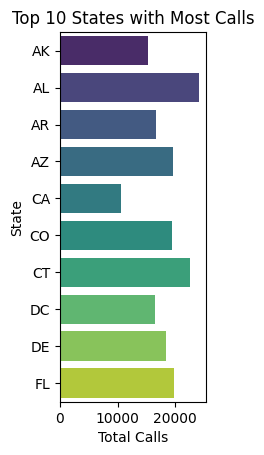

In [ ]:
# State with most calls
plt.subplot(1, 3, 1)
sns.barplot(x='total_calls', y='state', data=calls_by_state.head(10), palette='viridis')
plt.title('Top 10 States with Most Calls')
plt.xlabel('Total Calls')
plt.ylabel('State')

<ipython-input-28-6d1c32d9f557>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_calls', y='state', data=calls_by_state.tail(10), palette='viridis')


Text(0, 0.5, 'State')

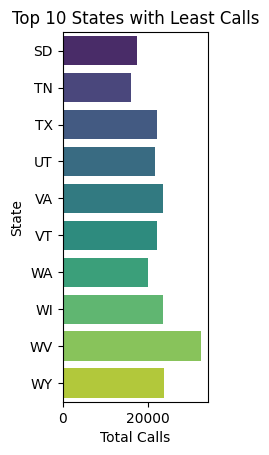

In [ ]:
# State with most calls
plt.subplot(1, 3, 1)
sns.barplot(x='total_calls', y='state', data=calls_by_state.tail(10), palette='viridis')
plt.title('Top 10 States with Least Calls')
plt.xlabel('Total Calls')
plt.ylabel('State')


In [ ]:
# Calculate total international calls for each state
int_calls_by_state = df.groupby('state')['total intl calls'].sum().reset_index()

# Sort the results by total international calls in descending order
int_calls_by_state_sorted = int_calls_by_state.sort_values(by='total intl calls', ascending=False)

# Display the result
print(int_calls_by_state_sorted)

   state  total intl calls
49    WV               468
34    NY               385
50    WY               383
1     AL               376
45    VA               365
23    MN               364
35    OH               341
37    OR               338
46    VT               336
13    ID               333
44    UT               333
43    TX               333
22    MI               332
48    WI               322
31    NJ               319
16    KS               315
3     AZ               311
20    MD               310
26    MT               309
24    MO               306
28    ND               305
6     CT               304
15    IN               304
39    RI               302
32    NM               300
47    WA               294
25    MS               294
36    OK               293
19    MA               289
33    NV               286
21    ME               285
27    NC               280
5     CO               271
41    SD               269
30    NH               264
8     DE               262
2

Similar to the total calls West Virgina had the most international calls totalling 468 and california with the least totalling to 151.

<ipython-input-30-dcbe714c85d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total intl calls', y='state', data=intl_calls_by_state.head(10), palette='viridis')


Text(0, 0.5, 'State')

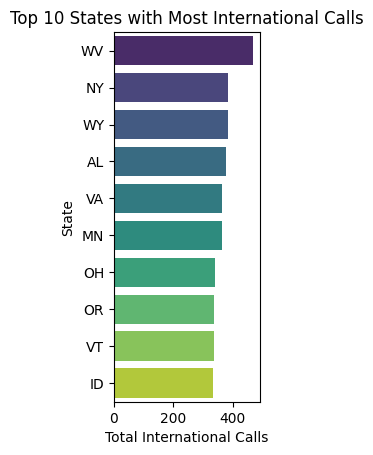

In [ ]:
# State with most international calls
plt.subplot(1, 3, 2)
sns.barplot(x='total intl calls', y='state', data=intl_calls_by_state.head(10), palette='viridis')
plt.title('Top 10 States with Most International Calls')
plt.xlabel('Total International Calls')
plt.ylabel('State')

<ipython-input-31-808dccbd9689>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total intl calls', y='state', data=intl_calls_by_state.tail(10), palette='viridis')


Text(0, 0.5, 'State')

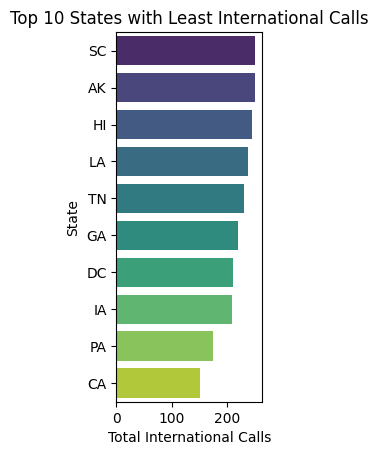

In [ ]:
# State with most international calls
plt.subplot(1, 3, 2)
sns.barplot(x='total intl calls', y='state', data=intl_calls_by_state.tail(10), palette='viridis')
plt.title('Top 10 States with Least International Calls')
plt.xlabel('Total International Calls')
plt.ylabel('State')

In [ ]:
# Sort the results by total international calls in descending order
charges_by_state_sorted = charges_by_state.sort_values(by='total_charges', ascending=False)

# Display the result
print(charges_by_state_sorted)

   state  total_charges
49    WV        6079.48
23    MN        5071.19
34    NY        4843.77
1     AL        4755.43
35    OH        4733.69
45    VA        4615.30
50    WY        4611.81
37    OR        4592.00
48    WI        4589.03
15    IN        4457.93
46    VT        4413.51
22    MI        4374.32
6     CT        4372.22
20    MD        4345.30
16    KS        4332.04
13    ID        4296.81
43    TX        4282.55
44    UT        4258.63
31    NJ        4244.56
27    NC        4097.17
26    MT        3974.84
19    MA        3946.19
47    WA        3917.56
33    NV        3916.43
5     CO        3905.78
25    MS        3846.68
28    ND        3788.76
39    RI        3787.24
9     FL        3775.89
21    ME        3731.58
41    SD        3675.33
24    MO        3662.91
32    NM        3656.85
29    NE        3632.22
3     AZ        3630.93
8     DE        3619.46
36    OK        3579.67
40    SC        3443.28
17    KY        3423.34
14    IL        3359.53
30    NH        

West Virgina has the highest charges amounting to 6079.48 and California has the least charges amounting to 2030.42. This is expected beacuse West Virginia has the highest amount of calls and California has the least amount of calls.

<ipython-input-33-217f8e4aa2df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_charges', y='state', data=charges_by_state.head(10), palette='viridis')


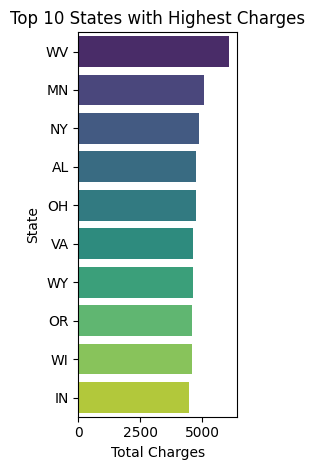

In [ ]:
# State with highest charges
plt.subplot(1, 3, 3)
sns.barplot(x='total_charges', y='state', data=charges_by_state.head(10), palette='viridis')
plt.title('Top 10 States with Highest Charges')
plt.xlabel('Total Charges')
plt.ylabel('State')

plt.tight_layout()
plt.show()

<ipython-input-34-0b3a7742245b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_charges', y='state', data=charges_by_state.tail(10), palette='viridis')


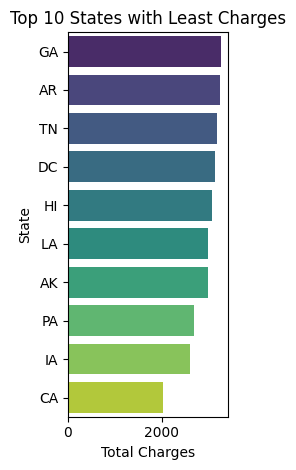

In [ ]:
# State with least charges
plt.subplot(1, 3, 3)
sns.barplot(x='total_charges', y='state', data=charges_by_state.tail(10), palette='viridis')
plt.title('Top 10 States with Least Charges')
plt.xlabel('Total Charges')
plt.ylabel('State')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate churn rate for each state
churn_by_state = df.groupby('state')['churn'].mean().reset_index()
churn_by_state.columns = ['state', 'churn_rate']

# Sort the states by churn rate
churn_by_state_sorted = churn_by_state.sort_values(by='churn_rate', ascending=False)

# Get the top 10 states with the highest churn rates
top_10_highest_churn = churn_by_state_sorted.head(10)

# Get the top 10 states with the lowest churn rates
top_10_lowest_churn = churn_by_state_sorted.tail(10)

<ipython-input-36-1231ae5c048b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn_rate', y='state', data=top_10_highest_churn, palette='viridis')


Text(0, 0.5, 'State')

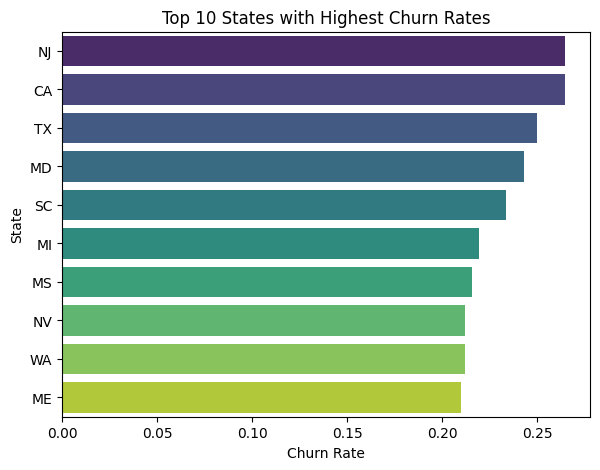

In [ ]:
# Plotting the top 10 states with the highest churn rates
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='churn_rate', y='state', data=top_10_highest_churn, palette='viridis')
plt.title('Top 10 States with Highest Churn Rates')
plt.xlabel('Churn Rate')
plt.ylabel('State')


The graph shows the top 10 states with the highest churn rates

<ipython-input-37-cde508b0a998>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn_rate', y='state', data=top_10_lowest_churn, palette='viridis')


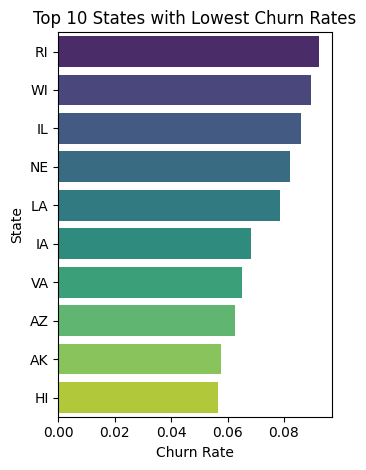

In [ ]:
# Plotting the top 10 states with the lowest churn rates
plt.subplot(1, 2, 2)
sns.barplot(x='churn_rate', y='state', data=top_10_lowest_churn, palette='viridis')
plt.title('Top 10 States with Lowest Churn Rates')
plt.xlabel('Churn Rate')
plt.ylabel('State')

plt.tight_layout()
plt.show()

The graph shows the Top 10 states with the lowest chrun rates

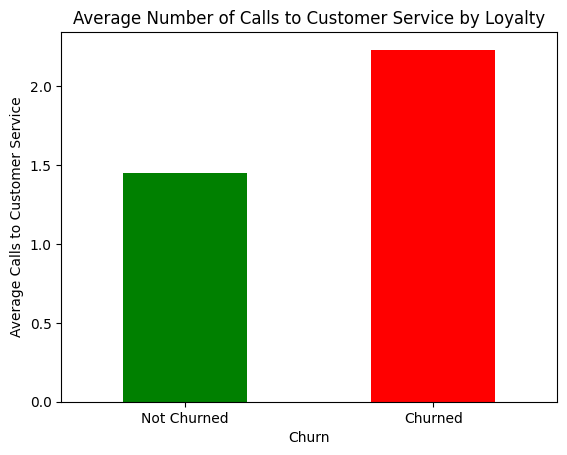

In [ ]:
# Average number of customer service calls
avg_calls = df.groupby('churn')['customer service calls'].mean()


avg_calls.plot(kind='bar', color=['green', 'red'])
plt.title('Average Number of Calls to Customer Service by Loyalty')
plt.xlabel('Churn')
plt.ylabel('Average Calls to Customer Service')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.show()

The users that left the telecommunication service called customer service more than those that stayed.

#### **Multivariate analysis**

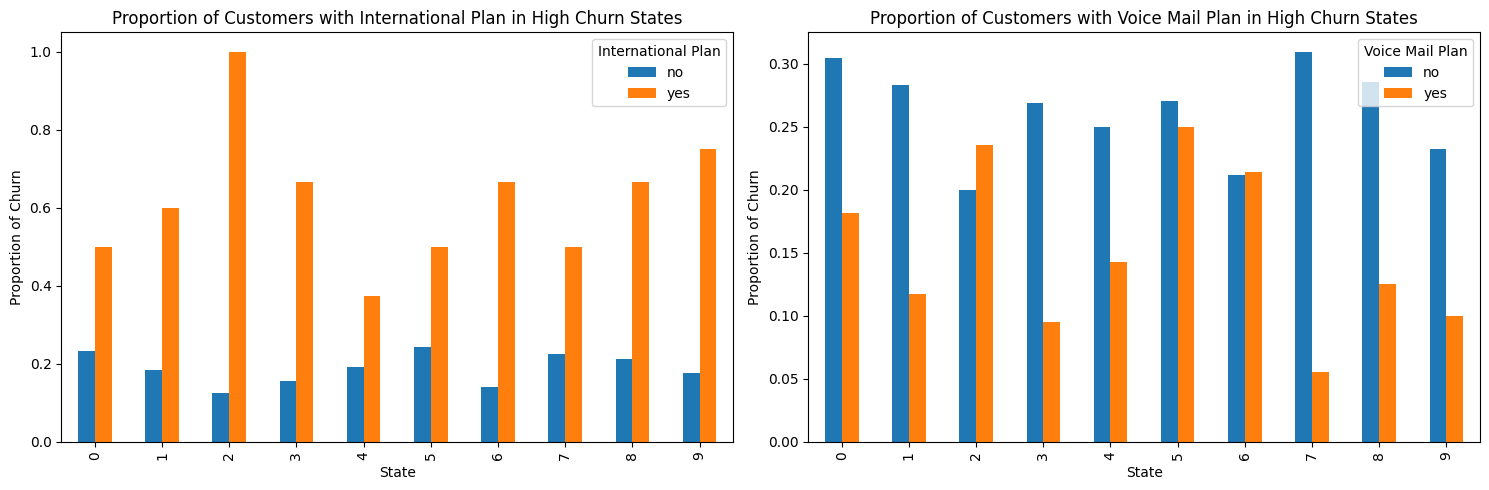

In [ ]:
# Step 1: Calculate churn rate for each state
churn_by_state = df.groupby('state')['churn'].mean().reset_index()
churn_by_state.columns = ['state', 'churn_rate']

# Step 2: Identify the states with the highest churn rates (top 10)
top_states_by_churn = churn_by_state.sort_values(by='churn_rate', ascending=False).head(10)
top_states = top_states_by_churn['state'].tolist()

# Step 3: Filter the original dataframe to include only customers from the top churn states
top_churn_df = df[df['state'].isin(top_states)]

# Step 4: Create plots to compare the proportion of customers with an international plan and voice mail plan in these states
plt.figure(figsize=(15, 5))

# Proportion of customers with an international plan
plt.subplot(1, 2, 1)
intl_plan_by_churn = top_churn_df.groupby(['state', 'international plan'])['churn'].mean().unstack().reset_index()
intl_plan_by_churn.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Proportion of Customers with International Plan in High Churn States')
plt.xlabel('State')
plt.ylabel('Proportion of Churn')
plt.legend(title='International Plan', loc='upper right')

# Proportion of customers with a voice mail plan
plt.subplot(1, 2, 2)
vm_plan_by_churn = top_churn_df.groupby(['state', 'voice mail plan'])['churn'].mean().unstack().reset_index()
vm_plan_by_churn.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Proportion of Customers with Voice Mail Plan in High Churn States')
plt.xlabel('State')
plt.ylabel('Proportion of Churn')
plt.legend(title='Voice Mail Plan', loc='upper right')

plt.tight_layout()
plt.show()

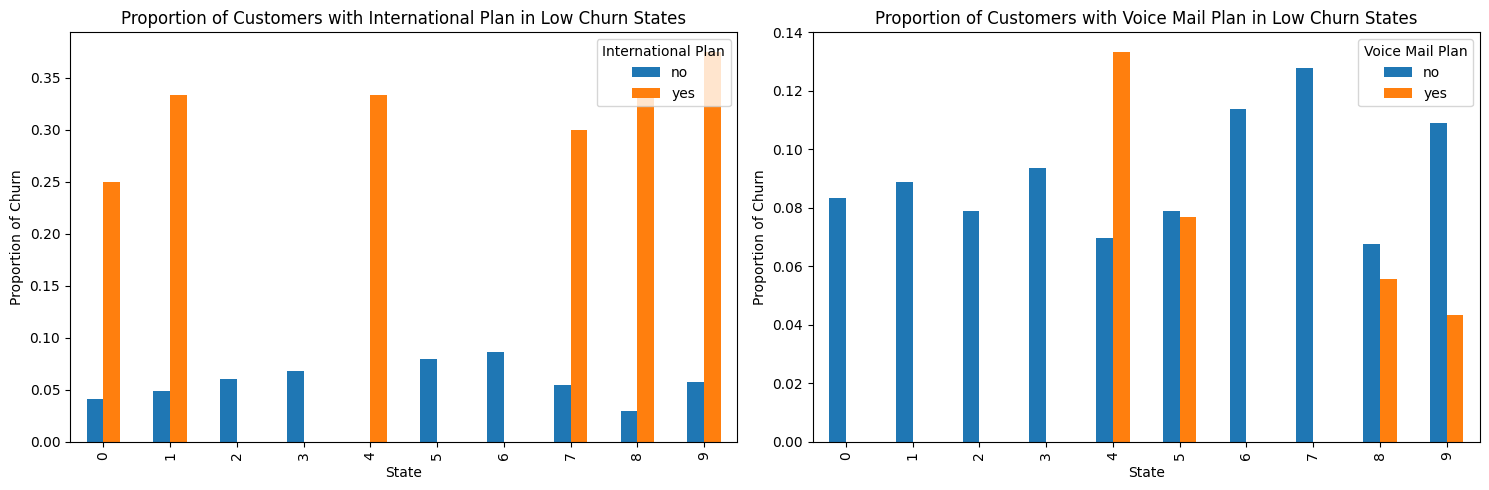

In [ ]:
# Step 1: Calculate churn rate for each state
churn_by_state = df.groupby('state')['churn'].mean().reset_index()
churn_by_state.columns = ['state', 'churn_rate']

# Step 2: Identify the states with the lowest churn rates (bottom 10)
lowest_states_by_churn = churn_by_state.sort_values(by='churn_rate').head(10)
lowest_states = lowest_states_by_churn['state'].tolist()

# Step 3: Filter the original dataframe to include only customers from the lowest churn states
lowest_churn_df = df[df['state'].isin(lowest_states)]

# Step 4: Create plots to compare the proportion of customers with an international plan and voice mail plan in these states
plt.figure(figsize=(15, 5))

# Proportion of customers with an international plan
plt.subplot(1, 2, 1)
intl_plan_by_churn = lowest_churn_df.groupby(['state', 'international plan'])['churn'].mean().unstack().reset_index()
intl_plan_by_churn.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Proportion of Customers with International Plan in Low Churn States')
plt.xlabel('State')
plt.ylabel('Proportion of Churn')
plt.legend(title='International Plan', loc='upper right')

# Proportion of customers with a voice mail plan
plt.subplot(1, 2, 2)
vm_plan_by_churn = lowest_churn_df.groupby(['state', 'voice mail plan'])['churn'].mean().unstack().reset_index()
vm_plan_by_churn.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Proportion of Customers with Voice Mail Plan in Low Churn States')
plt.xlabel('State')
plt.ylabel('Proportion of Churn')
plt.legend(title='Voice Mail Plan', loc='upper right')

plt.tight_layout()
plt.show()

Majority of the users in the states with Low churn rates had an international plan. However they did not have a voice mail plan.

## **EDA Summary**
Univariate Analysis

- Target Variable Distribution: The count plot shows a higher number of non-churned customers compared to churned ones, indicating class imbalance.

- Numeric Features Distribution: Histograms reveal that most features follow a normal distribution except for 'total international calls', 'customer service calls', and 'area code'.

- Boxplots: Highlight the presence of outliers in numerical features.

Bivariate Analysis

- Correlation Heatmap: Displays low correlations among most features.

- Categorical Features vs. Churn: Count plots indicate how different categorical features (e.g., 'international plan', 'voice mail plan') relate to churn status.
- Full Charge Analysis: Higher average charges correlate with a higher likelihood of churn.

## **Data Preprocessing**
Preparing the data before we start modeling the data. For this I will perform one hot encoding, spiliting and feature scaling.

In [ ]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'full charge', 'total_calls',
       'total_charges'],
      dtype='object')

In [ ]:
columns_to_drop = ['account length', 'area code', 'phone number']
data = df.drop(columns=columns_to_drop)
data.columns

Index(['state', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'full charge',
       'total_calls', 'total_charges'],
      dtype='object')

## **One Hot Encoing**

In [ ]:
# Binary encoding for binary categorical columns
data['international plan'] = data['international plan'].map({'no': 0, 'yes': 1})
data['voice mail plan'] = data['voice mail plan'].map({'no': 0, 'yes': 1})
data['churn'] = data['churn'].astype(int)

In [ ]:
# Viewing the data after one hot encoding
data.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,full charge,total_calls,total_charges
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,0,72.86,303,75.56
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,55.54,332,59.24
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,59.00,333,62.29
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,65.02,255,66.80
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,49.36,359,52.09


## **Feature Selection**

In [ ]:
# Selecting the features
selected_features = ['international plan', 'voice mail plan', 'number vmail messages',
                     'total intl calls', 'total_calls', 'total_charges', 'customer service calls',
                     'total intl calls']

# Selecting the target variable
target_variable = 'churn'

# Creating X (features) and y (target)
X = data[selected_features]
y = data[target_variable]

## **Spilting the data**

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **1. Logistic Regression**

In [ ]:
# Initializing and fitting the logistic regression model
model= LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

## **Evaluation**

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8545727136431784


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.57      0.16      0.25       101

    accuracy                           0.85       667
   macro avg       0.72      0.57      0.58       667
weighted avg       0.82      0.85      0.82       667



The model shows high precision for class 0 (non-churned customers), indicating that when it predicts a customer will not churn, it is correct 87% of the time.

However, the recall for class 1 (churned customers) is low, indicating that the model misses many churned customers.

The F1-score for class 1 is also relatively low, reflecting the imbalance between precision and recall.
The overall accuracy of 85% seems high, but it might be misleading due to the class imbalance. It's important to consider precision, recall, and F1-score for each class to get a better understanding of the model's performance, especially in imbalanced datasets like this one.

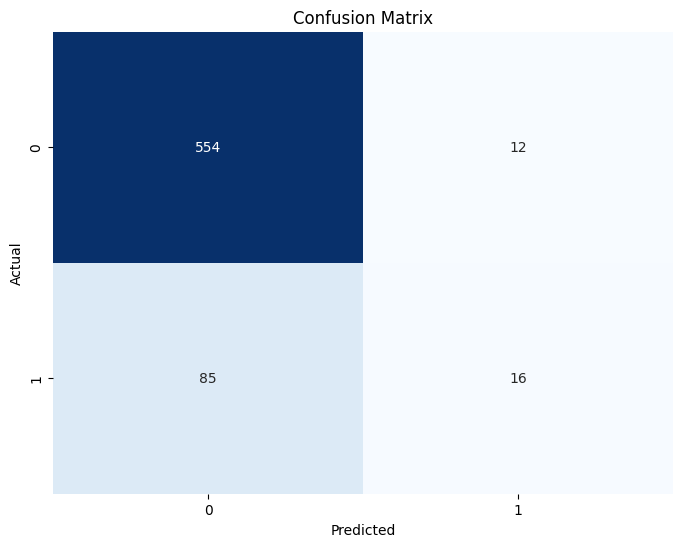

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **2. Decision Trees**

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion = "entropy")

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

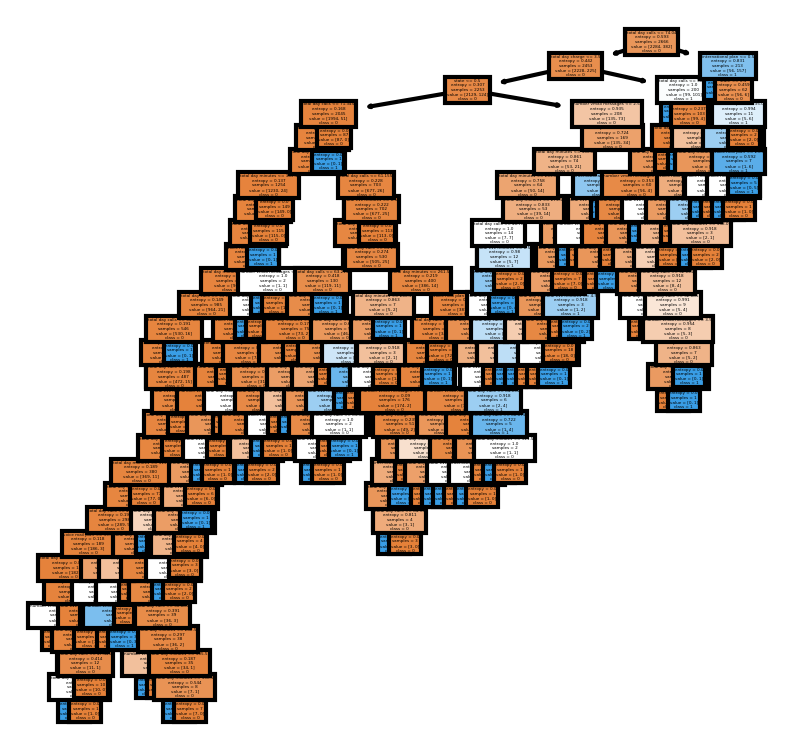

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(dt_classifier,
               feature_names = data.columns,
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

It is quiet tricky to visualize the decision tree because there are a lot  of features.

## **Evaluation**

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9325337331334332


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       566
           1       0.76      0.81      0.78       101

    accuracy                           0.93       667
   macro avg       0.86      0.88      0.87       667
weighted avg       0.93      0.93      0.93       667



Interpretation:
The precision of 0.75 for class 1 suggests that when the model predicts a customer will churn, it is correct about 75% of the time.
The recall of 0.81 for class 1 indicates that the model correctly identifies about 81% of all actual churned customers.
The F1-score of 0.78 for class 1 balances precision and recall, providing a single metric to evaluate the model's performance.
The accuracy of 0.93 indicates that the model performs well overall, correctly classifying 93% of the instances in the test dataset.
Macro avg and weighted avg provide aggregate metrics that consider both classes and their respective support.

In [ ]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[540  26]
 [ 19  82]]


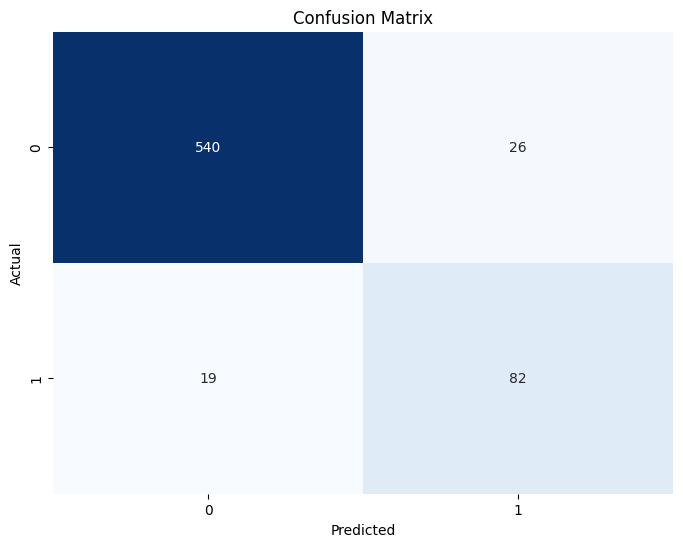

In [ ]:
# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Correct Predictions: The model correctly predicted 538 instances of non-churned customers and 82 instances of churned customers.

Incorrect Predictions:

The model incorrectly predicted 28 instances as churned customers when they are actually non-churned customers (false positives).
The model incorrectly predicted 19 instances as non-churned customers when they are actually churned customers (false negatives).
Interpretation:
The confusion matrix suggests that the model is performing well overall, with a large number of true positives and true negatives.
The false positives and false negatives are relatively low, indicating that the model's errors are minimal.
However, it's essential to consider the specific context and implications of false positives and false negatives in your application. For example, false positives may result in unnecessary interventions for customers who are not actually at risk of churning, while false negatives may lead to missed opportunities to intervene with customers who are at risk of churning.

## **Hyperparameter Tuning for Decision Trees**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier object
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

## **Evaluation**

In [ ]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       566
           1       0.94      0.80      0.87       101

    accuracy                           0.96       667
   macro avg       0.95      0.90      0.92       667
weighted avg       0.96      0.96      0.96       667



Improvement in Precision and F1-score: After hyperparameter tuning, there is a notable improvement in precision for class 1, indicating that the model's ability to correctly predict churned customers has significantly increased. The F1-score, which balances precision and recall, also shows improvement, indicating a better overall performance in classifying churned customers.

Slight Decrease in Recall: Although there was an increase in precision, the recall for class 1 slightly decreased after hyperparameter tuning. This suggests that the model may miss a few more actual churned customers compared to before tuning.

Significant Increase in Accuracy: The overall accuracy of the model improved from 0.93 to 0.96 after hyperparameter tuning. This indicates that the model's ability to correctly classify both churned and non-churned customers improved significantly.

Balanced Evaluation Metrics: The macro avg and weighted avg of precision, recall, and F1-score also show improvements after hyperparameter tuning, indicating a more balanced performance across both classes.

## **KNN**

In [ ]:
# Create a KNN classifier object
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()  # You can specify the number of neighbors (k) here

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9115442278860569

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       566
           1       0.94      0.45      0.60       101

    accuracy                           0.91       667
   macro avg       0.92      0.72      0.78       667
weighted avg       0.91      0.91      0.90       667



Interpretation:

The precision and recall trade-off: The model achieves high precision for both classes, indicating that the predictions are reliable. However, the recall for class 1 (churned customers) is relatively low, indicating that the model struggles to correctly identify churned customers.

F1-score: The F1-score for class 1 is moderate, indicating a balance between precision and recall, but it could be improved, especially in terms of recall.

Class imbalance: There's a significant class imbalance, with a larger number of instances for non-churned customers compared to churned customers. This can affect the model's performance, especially for the minority class (churned customers).

Overall accuracy: The model achieves a relatively high accuracy, but it's important to consider the context and implications of misclassifications, especially for churned customers. Further optimization may be needed to improve the model's performance, particularly in terms of recall for churned customers.

In [ ]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[563   3]
 [ 56  45]]


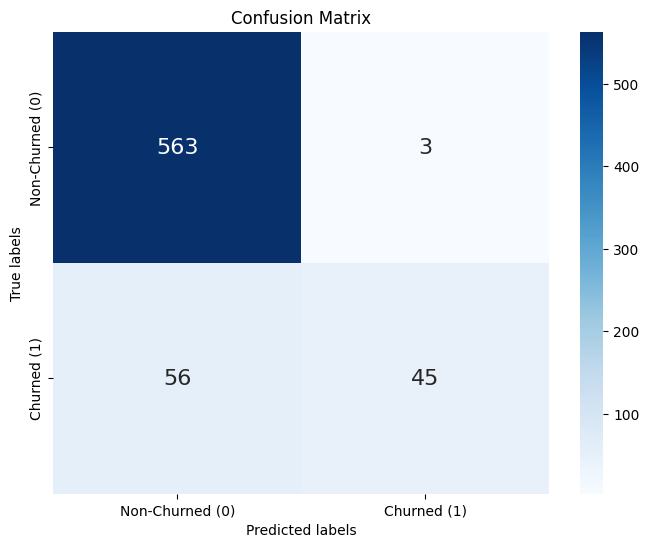

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Churned (0)', 'Churned (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Churned (0)', 'Churned (1)'])

# Show plot
plt.show()

## **Improving model performance**

In [ ]:
# Create a KNN classifier object
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # number of neighbors
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'p': [1, 2]  # power parameter for Minkowski distance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [ ]:
# Get the best model
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

## **Evaluation**

In [ ]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       566
           1       0.92      0.46      0.61       101

    accuracy                           0.91       667
   macro avg       0.92      0.72      0.78       667
weighted avg       0.91      0.91      0.90       667



In [ ]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[562   4]
 [ 55  46]]


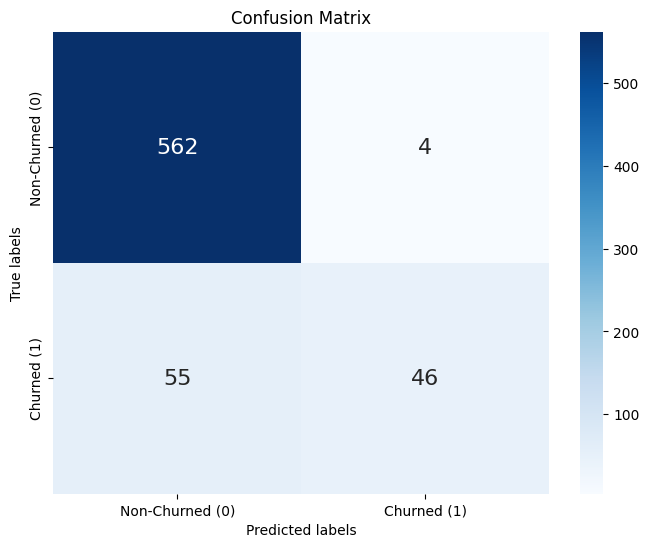

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Churned (0)', 'Churned (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Churned (0)', 'Churned (1)'])

# Show plot
plt.show()

Interpretation:

Precision: Before tuning, the precision for predicting churned customers was higher (0.94) compared to after tuning (0.92), indicating that a higher proportion of predicted churned customers were actually churned before tuning. However, the difference is relatively small.

Recall: Recall measures the ability of the model to correctly identify all actual churned customers. Before tuning, recall for churned customers was 0.45, and after tuning, it slightly increased to 0.46. This indicates a minor improvement in the model's ability to capture actual churned customers.

F1-Score: F1-score is the harmonic mean of precision and recall, providing a balance between them. Both precision and recall contribute to the F1-score. The F1-score for predicting churned customers improved marginally from 0.60 to 0.61 after tuning.

Accuracy: The overall accuracy remained the same at 0.91 before and after tuning. This suggests that while some improvements were observed in precision, recall, and F1-score for predicting churned customers, they were not significant enough to affect the overall accuracy of the model.

In summary, while hyperparameter tuning led to slight improvements in precision, recall, and F1-score for predicting churned customers, these improvements did not substantially impact the overall accuracy of the model

## **Model Comparison**
In this project I used three different models and evaluated each.

**Logistic Regression**: Simpler model with decent performance but struggles with class imbalance.

**Decision Tree**: Better balance between precision and recall, good interpretability but might overfit.

**KNN**: High accuracy and precision but indicates potential
overfitting and imbalance handling issues.

##**Recommendations**
**Improve Data Balance**: Implement techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the dataset.

**Model Ensemble**: Combine multiple models (e.g., using stacking or voting classifiers) to leverage their individual strengths.

**Customer Segmentation**: Use clustering techniques to segment customers and apply targeted retention strategies for different segments.

Develop a loyalty program that offers benefits like discounts, priority service, or exclusive offers for long-term customers.

Use CRM (Customer Relationship Management) tools to track customer history and preferences.

Reduce the number of calls to customer service by providing customers with self-service tools.

## **Next Steps**
**Deployment**: Develop a deployment pipeline to integrate the best model into SyriaTel’s system for real-time churn prediction.

**Monitoring and Maintenance**: Continuously monitor model performance and update it with new data to maintain its accuracy over time.

**A/B Testing**: Implement A/B tests to measure the effectiveness of retention strategies suggested by the model.

**Customer Feedback**: Collect feedback from customers to refine the model and retention strategies further.

**Regular Updates**: Schedule regular updates and model retraining sessions to ensure the model adapts to any changes in customer behavior.